<a href="https://colab.research.google.com/github/ishapna26/PnuemoniaDetection/blob/main/pneumoniaDetectionWithOptimalThreshold%26UncertaintyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shapnai","key":"d92c8faf0d536f8a7a3fe64720be84cc"}'}

In [ ]:
# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

# Download the Chest X-ray Pneumonia dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Extract the dataset
!unzip chest-xray-pneumonia.zip -d /content/drive/MyDrive/


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/drive/MyDrive/chest_xr

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model_path = '/content/drive/MyDrive/pneumonia_model/pneumonia_model.h5'  # Update this path accordingly
model = load_model(model_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


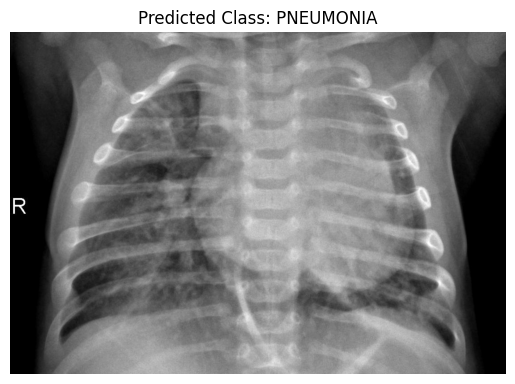

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the trained model
model_path = "/content/drive/MyDrive/pneumonia_model/pneumonia_model.h5"
model = tf.keras.models.load_model(model_path)

# Define the class names (NORMAL, PNEUMONIA)
class_names = ['NORMAL', 'PNEUMONIA']

# Function to preprocess the image
def preprocess_image(img_path, target_size=(220, 220)):  # Change size if different
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

# Provide the **exact** image path
img_path = "/content/drive/MyDrive/chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg"  # Change this to your image path

# Preprocess the image
test_image = preprocess_image(img_path)

# Make prediction
prediction = model.predict(test_image)
predicted_class = class_names[int(np.round(prediction[0][0]))]  # Assuming binary classification

# Display the image with prediction
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted Class: {predicted_class}")  # Show predicted class above image
plt.axis("off")
plt.show()



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Step 1: Load the Trained Model with Weights
model_path = "/content/drive/MyDrive/pneumonia_model/pneumonia_model.h5"
model = load_model(model_path)  # This loads both architecture & weights
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# ✅ Step 2: Define Test Data Generator
test_dir = "/content/drive/MyDrive/chest_xray/chest_xray/test"

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(220, 220),  # Resize images to match model input
    batch_size=16,  # Adjust batch size as needed
    class_mode="binary",  # Binary classification (NORMAL vs. PNEUMONIA)
    shuffle=False  # Do not shuffle test data
)

# ✅ Step 3: Evaluate Model Accuracy
test_loss, test_accuracy = model.evaluate(test_generator)

# ✅ Print Accuracy
print(f"✅ Final Model Test Accuracy: {test_accuracy * 100:.2f}%")


Found 624 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.9005 - loss: 0.3464
✅ Final Model Test Accuracy: 93.43%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# ✅ Get true labels and predicted labels
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32").flatten()  # Convert probabilities to binary labels

# ✅ Compute Precision, Recall, and F1-Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# ✅ Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step
Precision: 0.9049
Recall: 1.0000
F1-Score: 0.9501


39/39 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step


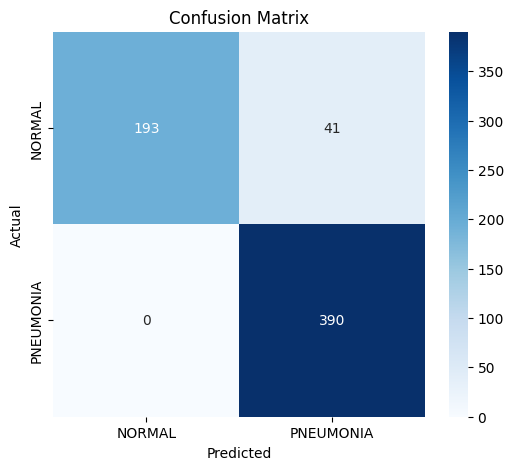

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ Get True Labels & Predictions
true_labels = test_generator.classes
predictions = (model.predict(test_generator) > 0.5).astype("int32").flatten()

# ✅ Compute Confusion Matrix
cm = confusion_matrix(true_labels, predictions)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["NORMAL", "PNEUMONIA"], yticklabels=["NORMAL", "PNEUMONIA"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


39/39 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step


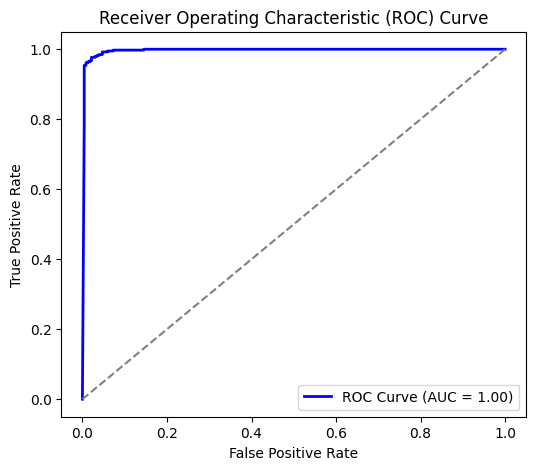

Calculated AUC Score: 0.9959
Confusion Matrix:
 [[193  41]
 [  0 390]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 1️⃣ Get the true labels (from test generator)
y_true = test_generator.classes  # Ground truth labels

# 2️⃣ Get predicted probabilities (not class labels)
y_probs = model.predict(test_generator)  # Sigmoid/Softmax probabilities

# 3️⃣ Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)  # Compute AUC score

# 4️⃣ Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# 5️⃣ Print AUC Score
print(f"Calculated AUC Score: {roc_auc:.4f}")

# 6️⃣ Verify with Confusion Matrix
y_pred_classes = (y_probs > 0.5).astype(int)  # Convert probabilities to class labels
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Get model predictions (probabilities)
y_probs = model.predict(test_generator)
y_true = test_generator.classes  # Actual labels

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

# Find best threshold (maximize F1-score or balance precision/recall)
best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]

print(f"Optimal Classification Threshold: {best_threshold:.2f}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step
Optimal Classification Threshold: 0.96


In [ ]:
# Define uncertainty range (tunable)
uncertainty_range = 0.10  # Example: 10% around 0.5

# Get predictions
y_preds = model.predict(test_generator)

# Flag uncertain cases
uncertain_cases = (y_preds > (0.5 - uncertainty_range)) & (y_preds < (0.5 + uncertainty_range))

# Count flagged cases
print(f"Total Uncertain Cases: {np.sum(uncertain_cases)}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 106s 3s/step
Total Uncertain Cases: 17


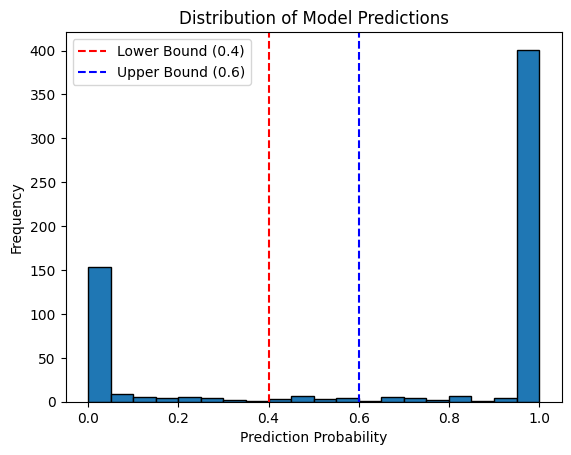

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_preds, bins=20, edgecolor='black')
plt.axvline(0.4, color='red', linestyle='dashed', label='Lower Bound (0.4)')
plt.axvline(0.6, color='blue', linestyle='dashed', label='Upper Bound (0.6)')
plt.legend()
plt.xlabel('Prediction Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Model Predictions')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get true labels from test generator
true_labels = test_generator.classes  # Actual class labels

# Get predicted probabilities from the model
y_pred_probs = model.predict(test_generator)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Print classification report (includes precision, recall, F1-score)
print(classification_report(true_labels, y_pred, target_names=['NORMAL', 'PNEUMONIA']))


39/39 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step
              precision    recall  f1-score   support

      NORMAL       1.00      0.82      0.90       234
   PNEUMONIA       0.90      1.00      0.95       390

    accuracy                           0.93       624
   macro avg       0.95      0.91      0.93       624
weighted avg       0.94      0.93      0.93       624

